# Regular expressions

## Nivell 1

### Execise 1

#### Identify and list all features from dataset

In [63]:
import pandas as pd
import numpy as np
import re
import requests
import json

In [45]:
#dataset of logs to imaginary website
data = pd.read_csv('Web_access_log-akumenius.com.txt', names=['records'])#txt file open with read_csv
pd.set_option('display.max_colwidth',None)#to get all information for each element
data[50:52]#show a sample of records

,records
50,"www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:11:15 +0100] ""GET /hoteles-baratos/ofertas-hotel-Hilton-London-Hyde-Park-en-Bayswater-7566b-destinos.html HTTP/1.1"" 404 3100 ""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-"
51,"www.akumenius.com 66.249.76.216 - - [23/Feb/2014:03:11:16 +0100] ""GET /destinos-baratos/destinosEstrelles/hoteles-en-Schmiedeberg_ALEMANIA-con-5-estrellas HTTP/1.1"" 200 8817 ""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-"


#### 1. Divide information in columns

**Simple split**

In [46]:
#info about of record - localhost or web? simple split
data[['web','info']] = data['records'].str.split(" ", 1, expand=True)
data.drop(['records'], axis=1, inplace=True)
#column info will serve for manipulation of the content
data[10:14]

,web,info
10,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
11,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
12,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
13,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"


**Regular expressions**

In [47]:
#ip? pattern with regular expressions
pattern='\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
search = []    
for values in data['info']:
    search.append(re.search(pattern, values).group())

data['ip'] = search
data.head(5)

,web,info,ip
0,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",127.0.0.1
1,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",127.0.0.1
2,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",127.0.0.1
3,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",127.0.0.1
4,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",127.0.0.1


In [48]:
#time?
pattern='\d{1,2}\/\w{1,3}\/\d{1,4}\:\d{1,2}\:\d{1,2}\:\d{1,2}\s\D\d{1,4}'
search = []    
for values in data['info']:
    search.append(re.search(pattern, values).group())

data['time'] = search
data.head(5)

,web,info,ip,time
0,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",127.0.0.1,23/Feb/2014:03:10:31 +0100
1,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",127.0.0.1,23/Feb/2014:03:10:31 +0100
2,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",127.0.0.1,23/Feb/2014:03:10:31 +0100
3,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",127.0.0.1,23/Feb/2014:03:10:31 +0100
4,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",127.0.0.1,23/Feb/2014:03:10:31 +0100


In [49]:
#get request Apache - all the information till HTTP/1.1 including
x = data['info'].str.split('\"',1, expand=True)
var = x[1].str.split('\"',1, expand=True)

In [50]:
data['get'] = var[0]
data.head(3)

,web,info,ip,time,get
0,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0
1,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0
2,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0


In [51]:
#numbers of visit
var2 = var[1].str.split('\"',1, expand=True)
var2[0] = var2[0].str.strip(' - ')

In [52]:
data['numbers'] = var2[0]
data[30:32]

,web,info,ip,time,get,numbers
30,www.akumenius.com,"66.249.76.216 - - [23/Feb/2014:03:10:46 +0100] ""GET /destinos-baratos/destinosEstrelles/hoteles-en-Skanderborg_DINAMARCA-con-5-estrellas HTTP/1.1"" 200 8816 ""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-",66.249.76.216,23/Feb/2014:03:10:46 +0100,GET /destinos-baratos/destinosEstrelles/hoteles-en-Skanderborg_DINAMARCA-con-5-estrellas HTTP/1.1,200 8816
31,www.akumenius.com,"66.249.76.216 - - [23/Feb/2014:03:10:47 +0100] ""GET /hoteles-baratos/ofertas-hotel-Casual-Hotel-Valencia-en-Valencia-205435b-destinos.html HTTP/1.1"" 404 3100 ""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-",66.249.76.216,23/Feb/2014:03:10:47 +0100,GET /hoteles-baratos/ofertas-hotel-Casual-Hotel-Valencia-en-Valencia-205435b-destinos.html HTTP/1.1,404 3100


In [53]:
#type of request
data[['type','get']] = data['get'].str.split('\W',1, expand=True)
data[30:34]

,web,info,ip,time,get,numbers,type
30,www.akumenius.com,"66.249.76.216 - - [23/Feb/2014:03:10:46 +0100] ""GET /destinos-baratos/destinosEstrelles/hoteles-en-Skanderborg_DINAMARCA-con-5-estrellas HTTP/1.1"" 200 8816 ""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-",66.249.76.216,23/Feb/2014:03:10:46 +0100,/destinos-baratos/destinosEstrelles/hoteles-en-Skanderborg_DINAMARCA-con-5-estrellas HTTP/1.1,200 8816,GET
31,www.akumenius.com,"66.249.76.216 - - [23/Feb/2014:03:10:47 +0100] ""GET /hoteles-baratos/ofertas-hotel-Casual-Hotel-Valencia-en-Valencia-205435b-destinos.html HTTP/1.1"" 404 3100 ""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-",66.249.76.216,23/Feb/2014:03:10:47 +0100,/hoteles-baratos/ofertas-hotel-Casual-Hotel-Valencia-en-Valencia-205435b-destinos.html HTTP/1.1,404 3100,GET
32,www.akumenius.com,"66.249.76.216 - - [23/Feb/2014:03:10:49 +0100] ""GET /hoteles-baratos/ofertas-hotel-Lucky-2-en-Hanoi-146288b-destinos.html HTTP/1.1"" 404 3100 ""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-",66.249.76.216,23/Feb/2014:03:10:49 +0100,/hoteles-baratos/ofertas-hotel-Lucky-2-en-Hanoi-146288b-destinos.html HTTP/1.1,404 3100,GET
33,www.akumenius.com,"66.249.76.216 - - [23/Feb/2014:03:10:52 +0100] ""GET /hoteles-baratos/ofertas-hotel-Natali-Torremolinos-en-Torremolinos-22598b-destinos.html HTTP/1.1"" 404 3100 ""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-",66.249.76.216,23/Feb/2014:03:10:52 +0100,/hoteles-baratos/ofertas-hotel-Natali-Torremolinos-en-Torremolinos-22598b-destinos.html HTTP/1.1,404 3100,GET


In [54]:
#browser?
pattern='\"[A-Z]\w+.\d.\d'
S = data['info']
x = [itm[0] for itm in S.str.findall('\"[A-Z]\w+.\d.\d') if len(itm)>0]
data['browser'] = x[0]
data['browser'] = data['browser'].str.strip('"')
data[30:32]

,web,info,ip,time,get,numbers,type,browser
30,www.akumenius.com,"66.249.76.216 - - [23/Feb/2014:03:10:46 +0100] ""GET /destinos-baratos/destinosEstrelles/hoteles-en-Skanderborg_DINAMARCA-con-5-estrellas HTTP/1.1"" 200 8816 ""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-",66.249.76.216,23/Feb/2014:03:10:46 +0100,/destinos-baratos/destinosEstrelles/hoteles-en-Skanderborg_DINAMARCA-con-5-estrellas HTTP/1.1,200 8816,GET,Mozilla/5.0
31,www.akumenius.com,"66.249.76.216 - - [23/Feb/2014:03:10:47 +0100] ""GET /hoteles-baratos/ofertas-hotel-Casual-Hotel-Valencia-en-Valencia-205435b-destinos.html HTTP/1.1"" 404 3100 ""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)"" VLOG=-",66.249.76.216,23/Feb/2014:03:10:47 +0100,/hoteles-baratos/ofertas-hotel-Casual-Hotel-Valencia-en-Valencia-205435b-destinos.html HTTP/1.1,404 3100,GET,Mozilla/5.0


In [59]:
#final table of content
dataMod = data[['web', 'ip', 'time', 'type', 'get', 'numbers', 'browser']]
dataMod[30:35]

,web,ip,time,type,get,numbers,browser
30,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:46 +0100,GET,/destinos-baratos/destinosEstrelles/hoteles-en-Skanderborg_DINAMARCA-con-5-estrellas HTTP/1.1,200 8816,Mozilla/5.0
31,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:47 +0100,GET,/hoteles-baratos/ofertas-hotel-Casual-Hotel-Valencia-en-Valencia-205435b-destinos.html HTTP/1.1,404 3100,Mozilla/5.0
32,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:49 +0100,GET,/hoteles-baratos/ofertas-hotel-Lucky-2-en-Hanoi-146288b-destinos.html HTTP/1.1,404 3100,Mozilla/5.0
33,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:52 +0100,GET,/hoteles-baratos/ofertas-hotel-Natali-Torremolinos-en-Torremolinos-22598b-destinos.html HTTP/1.1,404 3100,Mozilla/5.0
34,www.akumenius.com,66.249.76.216,23/Feb/2014:03:10:53 +0100,GET,/destinos-baratos/destinosEstrelles/hoteles-en-Villarcayo_ESPA%C3%91A-con-1-estrella HTTP/1.1,200 8810,Mozilla/5.0


## Nivell 2

### Execise 2

#### Localize IP's

In [61]:
dataMod.describe()

,web,ip,time,type,get,numbers,browser
count,261873,261873,261873,261873,261873,261775,261873
unique,5,2921,118735,5,66689,15608,1
top,www.akumenius.com,66.249.76.216,28/Feb/2014:04:16:25 +0100,GET,* HTTP/1.0,304,Mozilla/5.0
freq,232300,46382,83,229482,13892,25269,261873


There are 2921 different IP's to localize. Let's create a table with unique IP's and number of visits.

In [62]:
ip_geo = dataMod['ip'].value_counts().rename_axis('ip').reset_index(name="count")
ip_geo

,ip,count
0,66.249.76.216,46382
1,80.28.221.123,14725
2,127.0.0.1,13892
3,217.125.71.222,5201
4,66.249.75.148,3558
...,...,...
2916,209.19.176.65,1
2917,64.71.199.80,1
2918,54.196.12.48,1
2919,46.236.24.53,1


In [64]:
#first try with one IP
ip_address = '75.101.183.6'
request_url = 'https://geolocation-db.com/jsonp/' + ip_address
response = requests.get(request_url)
result = response.content.decode()
result = result.split("(")[1].strip(")")
result  = json.loads(result)
print(result)

{'country_code': 'US', 'country_name': 'United States', 'city': 'Ashburn', 'postal': '20149', 'latitude': 39.0481, 'longitude': -77.4728, 'IPv4': '75.101.183.6', 'state': 'Virginia'}


In [65]:
#adding new column
ip_geo['geo']= 'geo'
ip_geo.head(3)

,ip,count,geo
0,66.249.76.216,46382,geo
1,80.28.221.123,14725,geo
2,127.0.0.1,13892,geo


In [66]:
#extracting values of ip
totalIp = dataMod['ip'].values
totalIp

array(['127.0.0.1', '127.0.0.1', '127.0.0.1', ..., '127.0.0.1',
       '127.0.0.1', '127.0.0.1'], dtype=object)

In [67]:
#loop for all ip's - I have 2921 in total, long computing time
i = 0
while i < 2920:
    ip_address = ip_geo['ip'].values[i]
    request_url = 'https://geolocation-db.com/jsonp/' + ip_address
    response = requests.get(request_url)
    result = response.content.decode()
    result = result.split("(")[1].strip(")")
    result  = json.loads(result)
    ip_geo['geo'].values[i] = result
    i += 1

In [68]:
ip_geo.head(5)

,ip,count,geo
0,66.249.76.216,46382,"{'country_code': 'US', 'country_name': 'United States', 'city': None, 'postal': None, 'latitude': 37.751, 'longitude': -97.822, 'IPv4': '66.249.76.216', 'state': None}"
1,80.28.221.123,14725,"{'country_code': 'ES', 'country_name': 'Spain', 'city': 'Madrid', 'postal': '28045', 'latitude': 40.4165, 'longitude': -3.7026, 'IPv4': '80.28.221.123', 'state': 'Madrid'}"
2,127.0.0.1,13892,"{'country_code': 'Not found', 'country_name': 'Not found', 'city': 'Not found', 'postal': 'Not found', 'latitude': 'Not found', 'longitude': 'Not found', 'IPv4': 'IP Not found', 'state': 'Not found'}"
3,217.125.71.222,5201,"{'country_code': 'ES', 'country_name': 'Spain', 'city': 'Bormujos', 'postal': '41930', 'latitude': 37.3736, 'longitude': -6.0723, 'IPv4': '217.125.71.222', 'state': 'Seville'}"
4,66.249.75.148,3558,"{'country_code': 'US', 'country_name': 'United States', 'city': None, 'postal': None, 'latitude': 37.751, 'longitude': -97.822, 'IPv4': '66.249.75.148', 'state': None}"


In [126]:
#saving the database for later use
ip_geo.to_csv('ip_geo.csv')

## Nivell 3

### Execise 3

#### Creativity with IP's

In [69]:
data = pd.read_csv('ip_geo.csv')
ip_geo.head(5)

,ip,count,geo
0,66.249.76.216,46382,"{'country_code': 'US', 'country_name': 'United States', 'city': None, 'postal': None, 'latitude': 37.751, 'longitude': -97.822, 'IPv4': '66.249.76.216', 'state': None}"
1,80.28.221.123,14725,"{'country_code': 'ES', 'country_name': 'Spain', 'city': 'Madrid', 'postal': '28045', 'latitude': 40.4165, 'longitude': -3.7026, 'IPv4': '80.28.221.123', 'state': 'Madrid'}"
2,127.0.0.1,13892,"{'country_code': 'Not found', 'country_name': 'Not found', 'city': 'Not found', 'postal': 'Not found', 'latitude': 'Not found', 'longitude': 'Not found', 'IPv4': 'IP Not found', 'state': 'Not found'}"
3,217.125.71.222,5201,"{'country_code': 'ES', 'country_name': 'Spain', 'city': 'Bormujos', 'postal': '41930', 'latitude': 37.3736, 'longitude': -6.0723, 'IPv4': '217.125.71.222', 'state': 'Seville'}"
4,66.249.75.148,3558,"{'country_code': 'US', 'country_name': 'United States', 'city': None, 'postal': None, 'latitude': 37.751, 'longitude': -97.822, 'IPv4': '66.249.75.148', 'state': None}"


In [85]:
#dropping column 0
ip_geo=ip_geo.drop(0,axis=1)
ip_geo.head(5)

,ip,count,IPv4,city,country_code,country_name,latitude,longitude,postal,state
0,66.249.76.216,46382,66.249.76.216,None,US,United States,37.751,-97.822,None,None
1,80.28.221.123,14725,80.28.221.123,Madrid,ES,Spain,40.4165,-3.7026,28045,Madrid
2,127.0.0.1,13892,IP Not found,Not found,Not found,Not found,Not found,Not found,Not found,Not found
3,217.125.71.222,5201,217.125.71.222,Bormujos,ES,Spain,37.3736,-6.0723,41930,Seville
4,66.249.75.148,3558,66.249.75.148,None,US,United States,37.751,-97.822,None,None


In [94]:
#dropping all rows with not found
ip_geo2 = ip_geo[ip_geo.latitude != 'Not found']
ip_geo2.head(5)

,ip,count,IPv4,city,country_code,country_name,latitude,longitude,postal,state
0,66.249.76.216,46382,66.249.76.216,None,US,United States,37.751,-97.822,None,None
1,80.28.221.123,14725,80.28.221.123,Madrid,ES,Spain,40.4165,-3.7026,28045,Madrid
3,217.125.71.222,5201,217.125.71.222,Bormujos,ES,Spain,37.3736,-6.0723,41930,Seville
4,66.249.75.148,3558,66.249.75.148,None,US,United States,37.751,-97.822,None,None
5,162.243.192.191,2927,162.243.192.191,New York,US,United States,40.7308,-73.9975,10011,New York


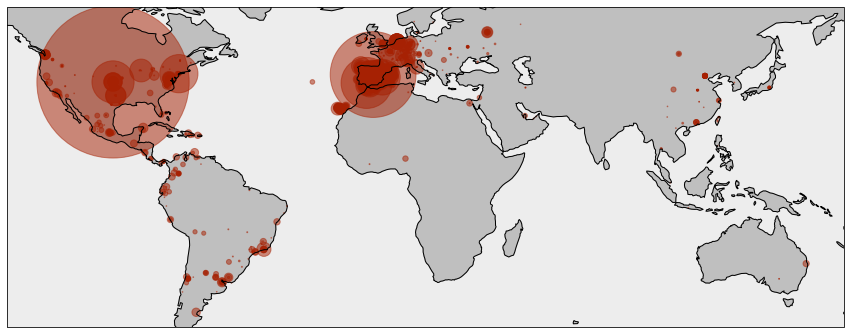

In [125]:
#map representing ip adresses
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import cartopy.crs as crs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, color="grey", alpha=0.5)
ax.add_feature(cfeature.OCEAN, color="lightgrey", alpha=0.4)

plt.scatter(x=ip_geo.longitude, y=ip_geo.latitude,
            color="#A62103",
            s=(ip_geo['count'])/2,
            alpha=0.5,
            transform=crs.PlateCarree())
plt.show()

Conclusion: On this map we can see that the most IP addresses were connected to the web from USA. The interesting thing is that the web has very few visits from China, Japan and Australia.

Notes:
* Regular expressions
    - https://regex101.com
* IP locate API
    - https://www.abstractapi.com/guides/how-to-geolocate-an-ip-address-in-python
* Bubble map 
    - https://coderzcolumn.com/tutorials/data-science/cartopy-basic-maps-scatter-map-bubble-map-and-connection-map